# Fake News Detection

Link to Dataset
https://www.kaggle.com/jruvika/fake-news-detection

In [118]:
#import libraries

import pandas as pd
import numpy as np
import nltk
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re
import string

from sklearn.model_selection import train_test_split

### Read Dataset 

Dowload the datset from kaggle and read it here and assigned the dataset into a dataframe named df and viewed the data to have an idea.

In [92]:
#read csv file and retrieve data
df = pd.read_csv('data.csv')

In [93]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [94]:
#view rows and columns
print(df.shape)

(4009, 4)


In [95]:
#delete URLs column as we dont need it for the classification

del df['URLs']

In [96]:
df.head()

,Headline,Body,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


### Combine Headline and Body columns

A news article has 2 sections as Headline and Body. In this dataset Headline and the Body are in 2 separated columns. So we combined those 2 columns (Headline column and Body column) into 1 column and named it as Headline_Body.

In [97]:
#combine Headline and Body columns
df['Headline_Body'] = df['Headline'].astype(str)+' '+df['Body']

#view new dataset
df

,Headline,Body,Label,Headline_Body
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,Four ways Bob Corker skewered Donald Trump Ima...
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,Linklater's war veteran comedy speaks to moder...
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,Jason Aldean opens 'SNL' with Vegas tribute Co...
...,...,...,...,...
4004,Trends to Watch,Trends to Watch\n% of readers think this story...,0,Trends to Watch Trends to Watch\n% of readers ...
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,Trump Jr. Is Soon To Give A 30-Minute Speech F...
4006,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0,NaN
4007,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1,China to accept overseas trial data in bid to ...


### Select the columns, we are going to use

Select Headline_Body and Label columns and save it to a new dataframe 

In [98]:
#retrieve needed columns to a dataframe

data = df[["Headline_Body", "Label"]]
data

,Headline_Body,Label
0,Four ways Bob Corker skewered Donald Trump Ima...,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute Co...,1
...,...,...
4004,Trends to Watch Trends to Watch\n% of readers ...,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,NaN,0
4007,China to accept overseas trial data in bid to ...,1


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 2 columns):
Headline_Body    3988 non-null object
Label            4009 non-null int64
dtypes: int64(1), object(1)
memory usage: 62.8+ KB


## Visualizing Data

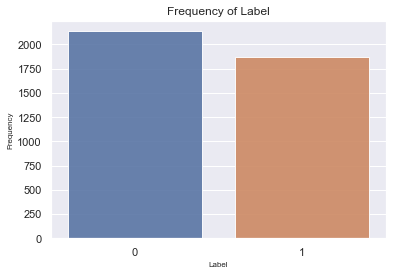

In [100]:
label_count = data["Label"].value_counts()
sns.set(style="darkgrid")
sns.barplot(label_count.index, label_count.values, alpha=0.9)
plt.title("Frequency of Label")
plt.ylabel("Frequency", fontsize=8)
plt.xlabel("Label", fontsize=8)
plt.show()

In [101]:
#view data in Total column by idnex

data['Headline_Body'][0]

'Four ways Bob Corker skewered Donald Trump Image copyright Getty Images\nOn Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.\nThis, in itself, isn\'t exactly huge news. It\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\nThis time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.\nHe said Mr Corker "begged" for the president\'s endorsement, which he refused to give. He wrongly claimed that Mr Corker\'s support of the Iranian nuclear agreement was his only political accomplishment.\nUnlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\nSkip Twitter post by @SenBobCorker It\'s a shame the White House has become an adult day care center. Someone obviously mi

### View and remove null values

For a higher accuracy we have to remove the null values. Below codes are to find out how many null values are there and to drop those vales

In [102]:
print(data.isnull().sum())

Headline_Body    21
Label             0
dtype: int64


In [103]:
#Delete rows with null value since it's small and won't affect the dataset
data = data.dropna(how='any',axis=0)

In [104]:
print(data.isnull().sum())

Headline_Body    0
Label            0
dtype: int64


In [105]:
# Covert all text as lowercase
data['Headline_Body'] = data['Headline_Body'].str.lower()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Remove Special Characters

In [106]:
#Function for Remove the tags
def CleanTags(line): 
    c = re.compile('<.*?>')
    cleanline = re.sub(c, ' ', line)
    return cleanline

In [107]:
#Function for cleaning words of punctuation or special characters
def CleanWords(line): 
    cleanedline = re.sub(r'[?|!|\'|"|#]',r'',line)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleanedline)
    return  cleaned

In [108]:
i = 0

#str1 = ' '
final_string = []

# Store words
all_positive_words = [] 
all_negative_words = [] 

s = ''

data = data.dropna(how = 'any', axis = 0)
for sent in data['Headline_Body'].values:
    filtered_sentence = []
    
    # Remove HTMl tags
    sent = CleanTags(sent) 
    for w in sent.split():
        for cleaned_words in CleanWords(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words) > 2)):    
                if(cleaned_words.lower() not in stopW):
                    s = (meth_Snow.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    
                    #list all words used to Fake news
                    if (data['Label'].values)[i] == 1: 
                        all_positive_words.append(s) 
                        
                    #list all words used to Real news
                    if(data['Label'].values)[i] == 0:
                        all_negative_words.append(s) 
                else:
                    continue
            else:
                continue 
  
    str1 = b" ".join(filtered_sentence) 
    
    str1 = str1.decode('utf-8')
    
    #final string of cleaned words
    final_string.append(str1)
    i += 1 

In [109]:
data['Cleaned_Headline_Body'] = final_string
data.head()

,Headline_Body,Label,Cleaned_Headline_Body
0,four ways bob corker skewered donald trump ima...,1,four way bob corker skewer donald trump imag c...
1,linklater's war veteran comedy speaks to moder...,1,linklat war veteran comedi speak modern americ...
2,trump’s fight with corker jeopardizes his legi...,1,fight corker jeopard legisl agenda feud broke ...
3,egypt's cheiron wins tie-up with pemex for mex...,1,egypt cheiron win pemex mexican onshor oil fie...
4,jason aldean opens 'snl' with vegas tribute co...,1,jason aldean open snl vega tribut countri sing...


In [110]:
data['Cleaned_Headline_Body'][0]

'four way bob corker skewer donald trump imag copyright getti imag sunday morn donald trump went twitter tirad member parti isnt exact huge news far first time presid turn rhetor cannon rank time howev attack particular bite person essenti call tennesse senat bob corker chair power senat foreign relat committe coward run said corker beg presid endors refus give wrong claim corker support iranian nuclear agreement polit accomplish unlik colleagu corker free worri immedi polit futur didnt hold tongu skip twitter post shame white hous becom adult day care center someon obvious miss shift morn senat bob corker octob report wasnt end though spoke new york time realli let presid four choic quot tennesse senat interview time particular damn dont know presid tweet thing true know everyon know cant realli sugarcoat one corker say presid liar everyon know senat particular challeng trump insist unsuccess plead endors accus much broader corker presid use someth akin alli tennessean trump short lis

### Divide dataset into training and testing sets

In [116]:
x1 = np.asarray(data['Cleaned_Headline_Body'])
y1 = np.asarray(data['Label'])

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state = 0)

In [123]:
x_train

array(['cut embassi staff warn travel cuba cut embassi staff warn travel cuba reader think stori fact add two cent news cdn www conservativedailynew com rich mitchel depart state pull major diplomat personnel american embassi havana warn american visit cuba least citizen station mysteri injur state depart send staff cuba leav halt visa process depart also issu travel warn urg american stay away carribean island nation fear could becom target attack happen hotel injuri result depart offici refer rang hear loss cognit issu sleep disord offici blame neurolog symptom express affect cuba deni anyth attack almost year first complaint investig unabl determin caus injuri cuban foreign minist bruno rodriguez met secretari state rex tillerson tuesday told cuban respons safeti peopl reduct staf come pivot time cuba raul castro expect step leader current term end earli canadian diplomat report suffer similar health problem articl cut embassi staff warn travel cuba origin content conserv daili news

### Vectorize Tokens

In [120]:
#import libraries to Convert the tokens into tf-idf weights and 
#then normalize the term vectors

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
#vectorize
tf_idf_Vector = TfidfVectorizer()

## fitting with train_x set
tf_idf_TrainSet = tf_idf_Vector.fit_transform(x_train)
tf_idf_TestSet = tf_idf_Vector.transform(x_test)